In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Pendulos acoplados
![Aquí la descripción de la imagen por si no carga](https://raw.githubusercontent.com/samuel896/MiPrimerRepositorio/master/red.png)

Vamos a suponer 4 pendulos acoplados, cada uno con igual longitud $l$, con diferentes masas colgando $m$ y con diferentes constantes elasticas $k$:

$$\ddot{x_{1}}=-\frac{g}{l}x_{1}+\frac{k_{1}}{m_{1}}(x_{2}-x_{1})$$

$$\ddot{x_{2}}=-\frac{g}{l}x_{2}-\frac{k_1}{m_2}(x_{2}-x_{1})+\frac{k_2}{m_2}(x_{3}-x_{2})$$

$$\ddot{x_{3}}=-\frac{g}{l}x_{3}-\frac{k_2}{m_3}(x_{3}-x_{2})+\frac{k_3}{m_3}(x_{4}-x_{3})$$

$$\ddot{x_{4}}=-\frac{g}{l}x_{4}-\frac{k_4}{m_4}(x_{4}-x_{3})$$

que podemos reescribir como:

$$\begin{pmatrix}
\ddot{x_{1}}\\
\ddot{x_{2}}\\
\ddot{x_{3}}\\
\ddot{x_{4}}
\end{pmatrix}
+
\begin{pmatrix}
\frac{g}{l}+\frac{k_1}{m_1} & -\frac{k_1}{m_1} & 0 & 0\\
-\frac{k_1}{m_2} & \frac{g}{l}+\frac{k_1}{m_2}+\frac{k_2}{m_2} & -\frac{k_2}{m_2} & 0 \\
0 & -\frac{k_2}{m_3} & \frac{g}{l}+\frac{k_2}{m_3}+\frac{k_3}{m_3} & -\frac{k_3}{m_3}\\
0 & 0 & -\frac{k_3}{m_4} & \frac{g}{l}+\frac{k_3}{m_4}
\end{pmatrix}
\begin{pmatrix}
x_{1}\\
x_{2}\\
x_{3}\\
x_{4}
\end{pmatrix}=\vec{0}
$$

Lo solucionaremos por valores y vectores propios.

En este caso, los valores propios equivalen a $ω_i^{2}$, entonces los vectores propios tambien estan asociados a estas frecuencias de oscilacion, entonces sea $T$ la matriz de transformacion formada por los vectores propios tal que:

$$X=TY$$
$$Y=T^{-1}X$$

solucionemos entonces la ecuacion correspondiente a los modos de oscilacion y despues transformamos a coordenadas espaciales:

$$\frac{dY_{i}^{2}}{dt^{2}}+diag(\omega_{i}^{2})Y=0$$

sea $z=y^{\prime}$

$$U=\begin{pmatrix}
y\\
z
\end{pmatrix}$$

entonces las ecuaciones quedan:

$$z^{\prime}_{1}+\omega_{1}^{2}y_{1}=0$$
$$z^{\prime}_{2}+\omega_{2}^{2}y_{2}=0$$
$$z^{\prime}_{3}+\omega_{3}^{2}y_{3}=0$$
$$z^{\prime}_{4}+\omega_{4}^{2}y_{4}=0$$

donde $\frac{dU}{dt}=\begin{pmatrix}
y^{\prime}\\
z^{\prime}
\end{pmatrix}=\begin{pmatrix}
z\\
-\omega_{i}^{2}y_{i}
\end{pmatrix}=\begin{pmatrix}
U_{1}\\
-\omega_{i}^{2}U_{0}
\end{pmatrix}
$

In [52]:
g=9.8#m/s^2
def oscilador_acoplado(K,M,l,U0,U1,U2,U3):
  '''
   g: aceleracion de la gravedad
   K: arreglo con las constantes elasticas de los 3 resortes
   M: arreglos con las 4 masas que cuelgan al final del pendulo
   l: longitud del pendulo
   U0: condiciones iniciales para el primer pendulo
   U1: condiciones iniciales para el segundo pendulo
   U2: condiciones iniciales para el tercer pendulo
   U3: condiciones iniciales para el cuarto pendulo

  '''
  A=np.array([[(g/l)+(K[0]/M[0]), -K[0]/M[0], 0,0],
              [-K[0]/M[1],(g/l)+(K[0]/M[1])+(K[1]/M[1]),-K[1]/M[1],0],
              [0,-K[1]/M[2],(g/l)+(K[1]/M[2])+(K[2]/M[2]),-K[2]/M[2]],
              [0,0,-K[2]/M[3],(g/l)+(K[2]/M[3])]])
  S, λ,vh=np.linalg.svd(A)
  ω1=np.sqrt((λ[0]/M[0]))
  ω2=np.sqrt((λ[1]/M[1]))
  ω3=np.sqrt((λ[2]/M[2]))
  ω4=np.sqrt((λ[3]/M[3]))
  def dU_dt1(U,t):
   return [U[1],
          -ω1*U[0]]
  def dU_dt2(U,t):
    return [U[1],
        -ω2*U[0]]
  def dU_dt3(U,t):
    return [U[1],
        -ω3*U[0]]
  def dU_dt4(U,t):
    return [U[1],
        -ω4*U[0]]
  ts=np.linspace(0,20,1000)
  Us1=integrate.odeint(dU_dt1,U0,ts)
  Us2=integrate.odeint(dU_dt2,U1,ts)
  Us3=integrate.odeint(dU_dt3,U2,ts)
  Us4=integrate.odeint(dU_dt3,U3,ts)
  Y=np.array([Us1[:,0],Us2[:,0],Us3[:,0],Us4[:,0]])
  x=np.linalg.inv(S)@Y
  plt.figure(figsize=(10,5))
  plt.title("Posicion vs tiempo de las 4 masas",fontsize=15)
  plt.plot(ts,x[0,:],label="$x_{1}$")
  plt.plot(ts,x[1,:],label="$x_{2}$")
  plt.plot(ts,x[2,:],label="$x_{3}$")
  plt.plot(ts,x[3,:],label="$x_{4}$")
  plt.xlabel("t",fontsize=15)
  plt.ylabel("x", fontsize=15)
  plt.legend()
  plt.grid()
  plt.show()
  #Espacio de fase:
  np.random.seed(1000307065)
  N=10000
  x0=np.random.uniform(-1,1,N)
  v0=np.random.uniform(-2*np.pi,2*np.pi,N)
  t=np.linspace(0,20,N)
  #construyamos el grafico
  i=0
  plt.figure()
  for x0,v0 in zip(x0,v0):
    U0=[x0,v0]
    Us1=integrate.odeint(dU_dt1,U0,t)
    plt.plot(Us1[:,0], Us1[:,1], lw=0.1,color= 'black')
    if i==100:
      break
    i=i+1
  plt.title("Espacio de fase$(x,v)$ para la masa 1",fontsize=15)
  plt.xlabel("x[m]", fontsize=15)
  plt.ylabel("v[m/s]",fontsize=15)
  plt.grid()
  plt.show()

  x1=np.random.uniform(-1,1,N)
  v1=np.random.uniform(-2*np.pi,2*np.pi,N)
  t=np.linspace(0,20,N)
  ii=0

  plt.figure()
  for x1,v1 in zip(x1,v1):
    U1=[x1,v1]
    Us2=integrate.odeint(dU_dt2,U1,t)
    plt.plot(Us2[:,0], Us2[:,1], lw=0.1,color= 'black')
    if ii==100:
      break
    ii=ii+1
  plt.title("Espacio de fase$(x,v)$ para la masa 2",fontsize=15)
  plt.xlabel("x[m]", fontsize=15)
  plt.ylabel("v[m/s]",fontsize=15)
  plt.grid()
  plt.show()

  x2=np.random.uniform(-1,1,N)
  v2=np.random.uniform(-2*np.pi,2*np.pi,N)
  j=0

  plt.figure()
  for x2,v2 in zip(x2,v2):
    U2=[x2,v2]
    Us3=integrate.odeint(dU_dt3,U2,t)
    plt.plot(Us3[:,0], Us3[:,1], lw=0.1,color= 'black')
    if j==100:
      break
    j=j+1
  plt.title("Espacio de fase$(x,v)$ para la masa 3",fontsize=15)
  plt.xlabel("x[m]", fontsize=15)
  plt.ylabel("v[m/s]",fontsize=15)
  plt.grid()
  plt.show()

  x3=np.random.uniform(-1,1,N)
  v3=np.random.uniform(-2*np.pi,2*np.pi,N)
  jj=0

  plt.figure()
  for x3,v3 in zip(x3,v3):
    U3=[x3,v3]
    Us4=integrate.odeint(dU_dt4,U3,t)
    plt.plot(Us4[:,0], Us4[:,1], lw=0.1,color= 'black')
    if jj==100:
      break
    jj=jj+1
  plt.title("Espacio de fase$(x,v)$ para la masa 4",fontsize=15)
  plt.xlabel("x[m]", fontsize=15)
  plt.ylabel("v[m/s]",fontsize=15)
  plt.grid()
  plt.show()

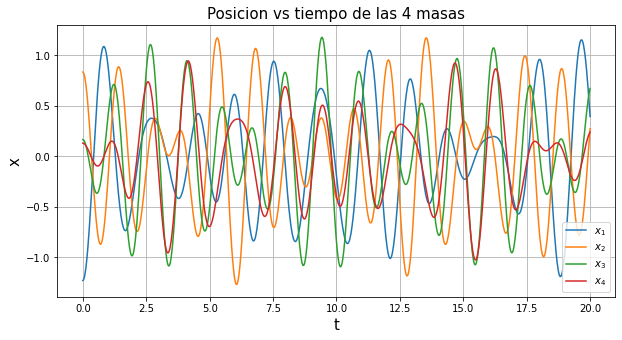

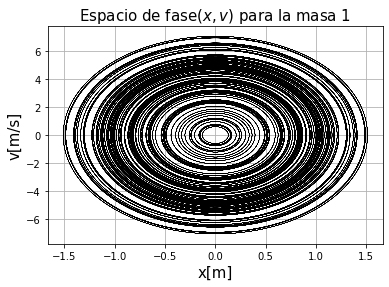

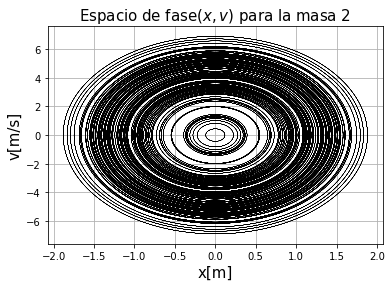

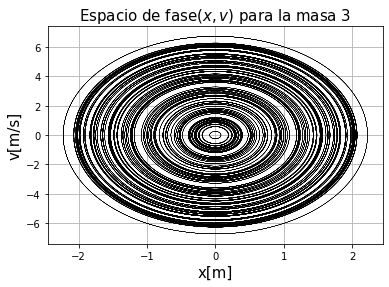

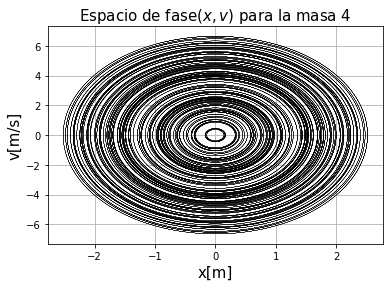

In [53]:
oscilador_acoplado([1,2,3],[0.1,0.2,0.3,0.4],0.5,[1,0],[-1,0],[0.5,0],[0,0])